<h1>Rain-Induced Fluctuations in Singapore's Tourism Number</h1>

<h2>Table of Content</h2>

1. Introduction
2. Loading Packages and Prepping Data
3. Exploratory Data Analysis
4. Data Analysis and Visualization
5. Conclusions
6. Coding Challenge (Part of Project 1)

## Introduction

### Problem Statement
To investigate if rainy seasons in Singapore influences incoming tourists timing of visit

Many studies had been performed over the past decades to elucidate the relationships between weather and tourism. It had been shown that timing of travel and destination choice made by tourists are highly influenced by weather and climate (Gössling et al., 2016). Weather also has a huge influence on activities, experiences and satisfaction (Steiger et al., 2016). <br>
A study done between 2013 and 2014 revealed that their discussion with 22 respondents predominantly revolved around rain, when prompted about weather in their past travels. Every respondent had pointed out that rain led to a negative holiday experience. Among all the negative weather experiences mentioned by the respondents, rain stood out as the most frequently cited memory. Reasons given includes ‘last-minute change of plans’ and ‘lack of indoor activities’ (Gössling et al., 2016).  
A separate study showed that summer tourists on average, can accept up to 2.1 days of continuous rain for a 1-week holiday (Steiger et al., 2016). Singapore is country with high number of rainy days and two monsoon seasons. Therefore, this analysis will look at whether rainy seasons will affect our tourism rate.<br>
Due to COVID-19 situation, we will ignore the tourist statistics from 2020 to present. To simplify the analysis, multiple countries had been grouped into regions to look at their tourism trend in Singapore. The regions we are analysing are Southeast Asia, Greater China, North Asia, West Asia, Americas, Europe, Oceania and Africa. The list of countries in each region are listed in the README file.<br>


References:<br>
<small>Gössling, S., Abegg, B., & Steiger, R. (2016). “It Was Raining All the Time!”: Ex Post Tourist Weather Perceptions. Atmosphere, 7(1), Article 1. https://doi.org/10.3390/atmos7010010 <br>
Steiger, R., Abegg, B., & Jänicke, L. (2016). Rain, Rain, Go Away, Come Again Another Day. Weather Preferences of Summer Tourists in Mountain Environments. Atmosphere, 7(5), Article 5. https://doi.org/10.3390/atmos7050063</small>




## <a id = "Loading-Packages-and-Prepping-Data">Loading Packages and Prepping Data</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-pastel')

In [2]:
#Datasets:
highest_daily_rainfall = pd.read_csv('data/rainfall-monthly-highest-daily-total.csv')
no_of_rain_monthly = pd.read_csv('data/rainfall-monthly-number-of-rain-days.csv')
total_monthly_rainfall = pd.read_csv('data/rainfall-monthly-total.csv')
mean_relative_humidity = pd.read_csv('data/relative-humidity-monthly-mean.csv')
sunshine_duration = pd.read_csv('data/sunshine-duration-monthly-mean-daily-duration.csv')
profile = pd.read_excel('data/tourism-industry-profile-monthly.xlsx', sheet_name = 'T1')
length_of_stay = pd.read_excel('data/tourism-industry-profile-monthly.xlsx', sheet_name = 'T2')
revenue = pd.read_excel('data/singapore-tourism-revenue.xlsx', sheet_name='2019 TR')

In [3]:
#To look at general trends by regions (a group of countries)
profile_by_region = profile.iloc[[1, 10, 15, 25, 32, 36, 52, 56], :] #only selecting rows of interest
profile_by_region = profile_by_region.rename({'Data Series':'Index'}, axis = 1)
profile_by_region = profile_by_region.T 
profile_by_region.columns = profile_by_region.iloc[0]
profile_by_region = profile_by_region[1:]
profile_by_region = profile_by_region[::-1] #reversing the date row order so that it will go from oldest to latest
profile_by_region = profile_by_region.reset_index()
profile_by_region = profile_by_region.rename({'index':'month'}, axis = 1)
profile_by_region.columns = profile_by_region.columns.str.strip() #removing white space in column title from the csv

In [4]:
profile_by_region.head()

Index,month,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa
0,1978 Jan,64500,na,na,1420,10105,25643,32710,587
1,1978 Feb,57650,na,na,1455,9996,26929,17189,354
2,1978 Mar,63299,na,na,3740,11982,29549,19637,405
3,1978 Apr,73782,na,na,2007,13951,25613,20123,736
4,1978 May,68036,na,na,2039,17022,20421,26288,514


In [5]:
#converting the 'na' string to NaN so that I can change the columns to numeric later
profile_by_region = profile_by_region.replace('na', np.nan) 

In [6]:
#to standardize the {year-month} format between different datasets for easier merging and analysis
def convert_date(the_df, month_col):
    monthdict = {'-01':' Jan', '-02':' Feb', '-03':' Mar', '-04':' Apr', '-05':' May', '-06':' Jun', '-07':' Jul','-08':' Aug', '-09':' Sep', '-10':' Oct', '-11':' Nov', '-12':' Dec'}
    the_df[month_col] = the_df.replace({month_col:monthdict}, regex=True)[month_col]
    return the_df

In [7]:
#merging different datasets into one dataframe
datasets = [highest_daily_rainfall, no_of_rain_monthly, total_monthly_rainfall, mean_relative_humidity, sunshine_duration]
for dataset in datasets:
    dataset = convert_date(dataset, 'month')
    profile_by_region = profile_by_region.merge(dataset, on = 'month')

In [8]:
profile_by_region.head()

,month,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs
0,1982 Jan,86569,NaN,NaN,3687,12654,37600,32964,1570,36.5,10,107.1,81.2,5.6
1,1982 Feb,80910,NaN,NaN,3366,15162,37046,21465,1112,9.4,5,27.8,79.5,7.6
2,1982 Mar,82332,NaN,NaN,3924,15901,39669,25585,922,61.7,11,160.8,82.3,5.1
3,1982 Apr,90806,NaN,NaN,3690,16164,35613,24377,955,45.1,14,157.0,85.9,4.7
4,1982 May,95876,NaN,NaN,3222,17131,30016,27511,868,33.0,10,102.2,83.2,5.8


In [9]:
#creating new column for the year and month
profile_by_region = profile_by_region.rename({'month':'Time Period'}, axis = 1)
profile_by_region['year'] = profile_by_region['Time Period'].str[:5].astype('int64')
profile_by_region['month'] = profile_by_region['Time Period'].str[5:]
profile_by_region.iloc[:,1:9] = profile_by_region.iloc[:,1:9].astype('float64')

In [10]:
profile_by_region.head()

,Time Period,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,year,month
0,1982 Jan,86569.0,NaN,NaN,3687.0,12654.0,37600.0,32964.0,1570.0,36.5,10,107.1,81.2,5.6,1982,Jan
1,1982 Feb,80910.0,NaN,NaN,3366.0,15162.0,37046.0,21465.0,1112.0,9.4,5,27.8,79.5,7.6,1982,Feb
2,1982 Mar,82332.0,NaN,NaN,3924.0,15901.0,39669.0,25585.0,922.0,61.7,11,160.8,82.3,5.1,1982,Mar
3,1982 Apr,90806.0,NaN,NaN,3690.0,16164.0,35613.0,24377.0,955.0,45.1,14,157.0,85.9,4.7,1982,Apr
4,1982 May,95876.0,NaN,NaN,3222.0,17131.0,30016.0,27511.0,868.0,33.0,10,102.2,83.2,5.8,1982,May


In [11]:
profile_by_region.info() #missing the first 288 visitors stats for Greater China and North Asia (I am not using those data)
#un-comment the line below to save dataframe to excel
#profile_by_region.to_excel('profile_by_region.xlsx')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 487
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time Period                488 non-null    object 
 1   Southeast Asia             488 non-null    float64
 2   Greater China              200 non-null    float64
 3   North Asia                 200 non-null    float64
 4   West Asia                  488 non-null    float64
 5   Americas                   488 non-null    float64
 6   Europe                     488 non-null    float64
 7   Oceania                    488 non-null    float64
 8   Africa                     488 non-null    float64
 9   maximum_rainfall_in_a_day  488 non-null    float64
 10  no_of_rainy_days           488 non-null    int64  
 11  total_rainfall             488 non-null    float64
 12  mean_rh                    488 non-null    float64
 13  mean_sunshine_hrs          488 non-null    float64

In [12]:
#preparing and cleaning length of stay data
length_of_stay = length_of_stay.iloc[1:-1,:4]
length_of_stay.drop(11, inplace=True)
length_of_stay.rename({'Data Series':'Length of Stay'}, axis = 1, inplace=True)
length_of_stay['Length of Stay'] = length_of_stay['Length of Stay'].str[:-9].str.strip()
length_of_stay = length_of_stay.T
length_of_stay.columns = length_of_stay.iloc[0]
length_of_stay.drop('Length of Stay', axis=0, inplace=True)
length_of_stay = length_of_stay[::-1]
length_of_stay.iloc[:,1:] = length_of_stay.iloc[:,1:].astype('Int64')
length_of_stay.columns = length_of_stay.columns.str.replace(' Days', '').str.replace(' Day', '')

In [13]:
length_of_stay
#un-comment the line below to save dataframe to excel
#length_of_stay.to_excel('length_of_stay.xlsx')

Length of Stay,Under 1,1,2,3,4,5,6,7,8-10,11-14,15-29,30-59,60 & Over
2023 Jan,211951.0,138280,132785,147876,98657,55345,33966,25254,38619,25198,36880,9911,3679
2023 Feb,206448.0,139108,147983,151180,91488,47411,29345,19736,23769,15402,24155,8663,3462
2023 Mar,213286.0,149807,156186,157625,99790,52587,31245,22532,27885,17442,24660,8579,3769


In [14]:
#preparing and cleaning 2019 TR revenue data
revenue = revenue.T
revenue.columns = revenue.iloc[0] 
revenue.drop('Market', axis=0, inplace=True)
revenue = revenue.astype('Int64')

In [15]:
revenue
#un-comment the line below to save dataframe to excel
#revenue.to_excel('revenue.xlsx')

Market,Mainland China,Indonesia,India,Australia,Japan,US,Malaysia,Philippines,South Korea,Vietnam,Others
2019 Tourism Receipt (in S$ millions),4124,3704,1624,1343,1162,885,733,721,675,668,12061


-----------------

## <a id='3'>Exploratory Data Analysis</a>

### Data Dictionary

<b>Dataframe: profile_by_region </b>

| Column Name               | Type    | Dataset                                       | Description                                                                                             |
|---------------------------|---------|-----------------------------------------------|---------------------------------------------------------------------------------------------------------|
| Time Period               | object  | tourism-industry-profile-monthly              | Year and Month of Data                                                                                  |
| Southeast Asia            | float64 | tourism-industry-profile-monthly              | International visitor arrivals from Southeast Asia (monthly) from 1978 to Mar 2023                      |
| Greater China             | float64 | tourism-industry-profile-monthly              | International visitor arrivals from Greater China (monthly) from 1978 to Mar 2023                       |
| North Asia                | float64 | tourism-industry-profile-monthly              | International visitor arrivals from North Asia (monthly) from 1978 to Mar 2023                          |
| West Asia                 | float64 | tourism-industry-profile-monthly              | International visitor arrivals from West Asia (monthly) from 1978 to Mar 2023                           |
| Americas                  | float64 | tourism-industry-profile-monthly              | International visitor arrivals from Americas (monthly) from 1978 to Mar 2023                            |
| Europe                    | float64 | tourism-industry-profile-monthly              | International visitor arrivals from Europe (monthly) from 1978 to Mar 2023                              |
| Oceania                   | float64 | tourism-industry-profile-monthly              | International visitor arrivals from Oceania (monthly) from 1978 to Mar 2023                             |
| Africa                    | float64 | tourism-industry-profile-monthly              | International visitor arrivals from Africa (monthly) from 1978 to Mar 2023                              |
| maximum_rainfall_in_a_day | float64 | rainfall-monthly-highest-daily-total          | The highest daily total rainfall for the month recorded at the Changi Climate Station from 1982 to 2022 |
| no_of_rainy_days          | int64   | rainfall-monthly-number-of-rain-days          | Monthly number of rain days from 1982 to 2022                                                           |
| total_rainfall            | float64 | rainfall-monthly-total                        | Monthly total rain recorded in millimeters from 1982 to 2022                                            |
| mean_rh                   | float64 | relative-humidity-monthly-mean                | The monthly mean relative humidity recorded at the Changi Climate Station from 1982 to 2022             |
| mean_sunshine_hrs         | float64 | sunshine-duration-monthly-mean-daily-duration | The monthly mean sunshine hours in a day recorded at the Changi Climate Station from 1982 to 2022       |
| year                      | int64   | tourism-industry-profile-monthly              | Split from Time Period for easier data sorting                                                          |
| month                     | object  | tourism-industry-profile-monthly              | Split from Time Period for easier data sorting                                                          |

<h3>1. Exploring Singapore weather trend over 10 years

In [16]:
#filtering to look at the weather trend from Jan 2012 to Dec 2021
ten_years_weather = profile_by_region[(profile_by_region['year'] < 2022) & (profile_by_region['year'] > 2011)].iloc[:,9:]

In [17]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#General overview of the ten years weather
ten_years_weather.pivot_table(index='month', values=('maximum_rainfall_in_a_day', 'no_of_rainy_days', 'total_rainfall', 'mean_rh', 'mean_sunshine_hrs'), 
                              aggfunc=(np.mean, np.median, np.std, max)).reindex(months)


maximum_rainfall_in_a_day                          mean_rh         \
                            max   mean median        std     max   mean   
month                                                                     
Jan                       210.6  59.68   38.9  54.868100    87.3  81.26   
Feb                        95.2  29.82   18.6  31.257987    86.9  78.55   
Mar                        92.3  38.27   34.1  24.296504    87.3  77.92   
Apr                        83.8  40.06   42.2  21.130505    85.1  79.39   
May                        79.2  43.76   46.8  18.769195    83.1  80.21   
Jun                        67.8  35.44   33.6  14.474130    80.2  78.16   
Jul                        75.0  38.16   33.9  18.593858    81.1  77.87   
Aug                        71.4  38.60   34.6  18.805909    80.4  77.54   
Sep                        63.4  35.32   34.3  15.138237    81.3  77.29   
Oct                       139.8  56.18   46.2  38.197784    82.5  77.96   
Nov                        73.4  50.02   48.5  17.366750    86.3  82.12   
Dec                       119.8  65.30   64.0  23.754719    87.0  82.07   

                       mean_sunshine_hrs                         \
      median       std               max  mean median       std   
month                                                             
Jan    80.85  4.043156               7.4  5.92   6.00  1.270870   
Feb    76.60  4.923018               9.2  7.44   7.65  1.476633   
Mar    76.30  4.404745               8.3  7.07   7.40  1.222066   
Apr    78.05  3.288515               7.2  6.28   6.35  0.775743   
May    79.25  2.043119               7.0  5.92   5.80  0.436654   
Jun    78.40  1.860227               6.7  5.70   6.00  0.909212   
Jul    77.95  2.000583               7.5  6.39   6.25  0.678970   
Aug    78.00  2.775368               7.6  6.11   6.10  0.901172   
Sep    77.20  2.917552               7.0  5.66   5.65  0.899630   
Oct    78.20  3.131276               6.5  5.61   5.95  0.793655   
Nov    82.05  2.868527               5.5  4.50   4.45  0.658281   
Dec    82.05  4.019411               5.6  4.73   5.10  0.808359   

      no_of_rainy_days                        total_rainfall                  \
                   max  mean median       std            max    mean  median   
month                                                                          
Jan                 25  13.5   15.0  6.802777          692.8  197.91  116.35   
Feb                 22   8.5    7.0  6.346478          395.2   95.46   48.30   
Mar                 21   9.7    9.0  4.877385          313.4  110.00   85.10   
Apr                 21  15.3   14.0  3.831159          290.4  161.60  167.10   
May                 19  15.4   15.5  2.796824          292.0  180.46  191.90   
Jun                 21  13.8   12.5  4.467164          233.8  128.40  108.70   
Jul                 22  14.1   14.0  4.629615          195.8  131.10  142.00   
Aug                 24  14.4   13.5  5.189733          293.6  146.52  130.40   
Sep                 19  12.9   13.5  5.087021          257.0  127.59  121.65   
Oct                 19  14.8   15.5  3.359894          285.4  158.36  149.50   
Nov                 27  20.8   22.0  4.211096          312.4  222.28  235.70   
Dec                 23  19.3   19.5  3.164034          421.5  289.02  297.45   

                   
              std  
month              
Jan    191.343940  
Feb    123.616577  
Mar     86.254559  
Apr     78.307088  
May     74.302508  
Jun     57.061370  
Jul     52.731374  
Aug     80.132180  
Sep     67.783289  
Oct     65.578303  
Nov     76.880467  
Dec     93.662192

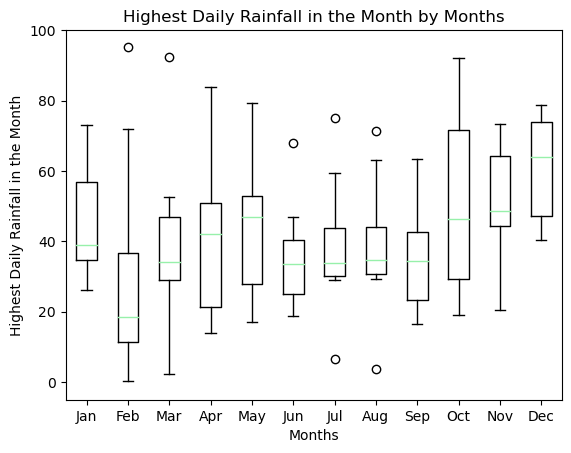

In [18]:
max_rainfall_list = []
for x in ten_years_weather['month'].unique():
    data = ten_years_weather[ten_years_weather['month'] == x]['maximum_rainfall_in_a_day'].to_list()
    max_rainfall_list.append(data)
fig, ax = plt.subplots()
ax.boxplot(max_rainfall_list)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], months)
plt.ylim((-5, 100))
plt.title('Highest Daily Rainfall in the Month by Months')
plt.xlabel('Months')
plt.ylabel('Highest Daily Rainfall in the Month')
plt.show()

Rains in February tends to be smaller than the rain in other months. Heavier rains can be expected between April and May, and between October and January.

<Figure size 640x480 with 0 Axes>

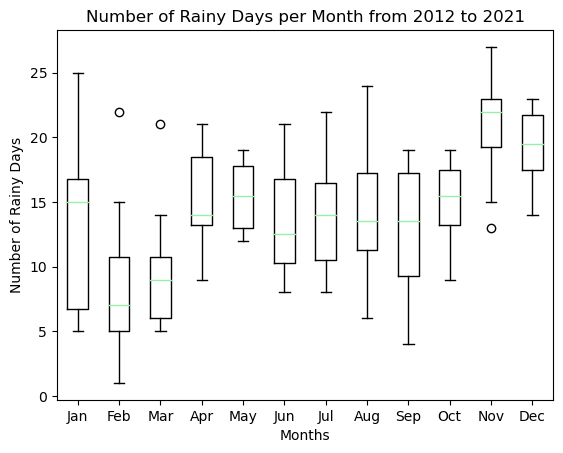

In [19]:
rainy_day_list = []
for x in ten_years_weather['month'].unique():
    data = ten_years_weather[ten_years_weather['month'] == x]['no_of_rainy_days'].to_list()
    rainy_day_list.append(data)
plt.figure(figsize = (6.4, 4.8))
fig, ax = plt.subplots()
ax.boxplot(rainy_day_list)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], months)
plt.title('Number of Rainy Days per Month from 2012 to 2021')
plt.xlabel('Months')
plt.ylabel('Number of Rainy Days')
plt.show()

The general trend for number of rainy days per month was that February is a dry month with little rain. Number of rainy days increases during March to April, and stays relatively consistent from May to September. October saw more rainy days than the previous months, which continues to increase in number of wet days in November and December before decreasing in January.

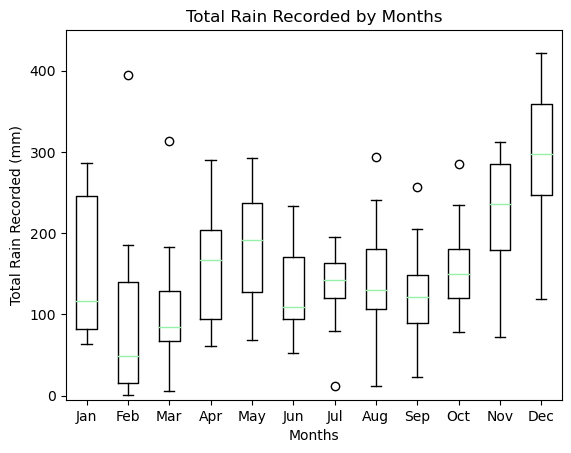

In [20]:
total_rainfall_list = []
for x in ten_years_weather['month'].unique():
    data = ten_years_weather[ten_years_weather['month'] == x]['total_rainfall'].to_list()
    total_rainfall_list.append(data)
fig, ax = plt.subplots()
ax.boxplot(total_rainfall_list)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], months)
plt.title('Total Rain Recorded by Months')
plt.xlabel('Months')
plt.ylabel('Total Rain Recorded (mm)')
plt.ylim((-5,450))
plt.show()

Similar to the trend for maximum daily rain and number of rainy days, we can see a consistent trend that April to May and October to January tend to be wetter months compared to the other months. February is the dryest month.<br>
<small>*The outlier from Jan 2019 heavy rain was excluded from this graph

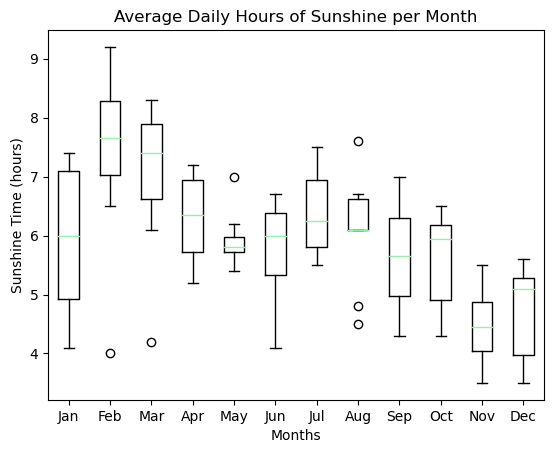

In [21]:
sunshine_list = []
for x in ten_years_weather['month'].unique():
    data = ten_years_weather[ten_years_weather['month'] == x]['mean_sunshine_hrs'].to_list()
    sunshine_list.append(data)
fig, ax = plt.subplots()
ax.boxplot(sunshine_list)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], months)
plt.title('Average Daily Hours of Sunshine per Month')
plt.xlabel('Months')
plt.ylabel('Sunshine Time (hours)')
plt.show()

The dryer months with lesser rainy days on average have longer average daily sunshine time. 

In [22]:
ten_years_weather.corr()

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,year
maximum_rainfall_in_a_day,1.000000,0.421532,0.833611,0.359236,-0.425542,0.011896
no_of_rainy_days,0.421532,1.000000,0.673883,0.646882,-0.733604,-0.058511
total_rainfall,0.833611,0.673883,1.000000,0.576942,-0.632134,0.005237
mean_rh,0.359236,0.646882,0.576942,1.000000,-0.568989,-0.315776
mean_sunshine_hrs,-0.425542,-0.733604,-0.632134,-0.568989,1.000000,0.159629
year,0.011896,-0.058511,0.005237,-0.315776,0.159629,1.000000


In [23]:
#to find the year and month of the highest and lowest total rain volume in a day in the last 10 years
print('Month with highest recorded total rain volume in a day (2012-2021)')
print(ten_years_weather.loc[ten_years_weather['maximum_rainfall_in_a_day'].idxmax()])
print('')
print('Month with lowest recorded total rain volume in a day (2012-2021)')
print(ten_years_weather.loc[ten_years_weather['maximum_rainfall_in_a_day'].idxmin()])

Month with highest recorded total rain volume in a day (2012-2021)
maximum_rainfall_in_a_day    210.6
no_of_rainy_days                17
total_rainfall               692.8
mean_rh                       82.6
mean_sunshine_hrs              4.2
year                          2021
month                          Jan
Name: 468, dtype: object

Month with lowest recorded total rain volume in a day (2012-2021)
maximum_rainfall_in_a_day     0.2
no_of_rainy_days                1
total_rainfall                0.2
mean_rh                      74.5
mean_sunshine_hrs             8.8
year                         2014
month                         Feb
Name: 385, dtype: object


In [24]:
#to find the year and month with the most and least total rain volume in the past 10 years
print('Month with highest recorded total rain volume in a month (2012-2021)')
print(ten_years_weather.loc[ten_years_weather['total_rainfall'].idxmax()])
print('')
print('Month with lowest recorded total rain volume in a month (2012-2021)')
print(ten_years_weather.loc[ten_years_weather['total_rainfall'].idxmin()])

Month with highest recorded total rain volume in a month (2012-2021)
maximum_rainfall_in_a_day    210.6
no_of_rainy_days                17
total_rainfall               692.8
mean_rh                       82.6
mean_sunshine_hrs              4.2
year                          2021
month                          Jan
Name: 468, dtype: object

Month with lowest recorded total rain volume in a month (2012-2021)
maximum_rainfall_in_a_day     0.2
no_of_rainy_days                1
total_rainfall                0.2
mean_rh                      74.5
mean_sunshine_hrs             8.8
year                         2014
month                         Feb
Name: 385, dtype: object


In [25]:
#to find the year and month with the most and least rainy days in the past 10 years
print('Month with most rainy days (2012-2021)')
print(ten_years_weather.loc[ten_years_weather['no_of_rainy_days'].idxmax()])
print('')
print('Month with least rainy days (2012-2021)')
print(ten_years_weather.loc[ten_years_weather['no_of_rainy_days'].idxmin()])

Month with most rainy days (2012-2021)
maximum_rainfall_in_a_day     20.6
no_of_rainy_days                27
total_rainfall               169.6
mean_rh                       83.2
mean_sunshine_hrs              3.8
year                          2018
month                          Nov
Name: 442, dtype: object

Month with least rainy days (2012-2021)
maximum_rainfall_in_a_day     0.2
no_of_rainy_days                1
total_rainfall                0.2
mean_rh                      74.5
mean_sunshine_hrs             8.8
year                         2014
month                         Feb
Name: 385, dtype: object


In [26]:
#to find the year and month with the most and least mean sunshine hours
print('Month with most mean sunshine hours (2012-2021)')
print(ten_years_weather.loc[ten_years_weather['mean_sunshine_hrs'].idxmax()])
print('')
print('Month with least mean sunshine hours (2012-2021)')
print(ten_years_weather.loc[ten_years_weather['mean_sunshine_hrs'].idxmin()])

Month with most mean sunshine hours (2012-2021)
maximum_rainfall_in_a_day    13.4
no_of_rainy_days                5
total_rainfall               31.6
mean_rh                      74.1
mean_sunshine_hrs             9.2
year                         2019
month                         Feb
Name: 445, dtype: object

Month with least mean sunshine hours (2012-2021)
maximum_rainfall_in_a_day    119.8
no_of_rainy_days                21
total_rainfall               348.2
mean_rh                       85.8
mean_sunshine_hrs              3.5
year                          2013
month                          Dec
Name: 383, dtype: object


<h2>2. Exploring Tourists Numbers and Trends by Months</h2>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

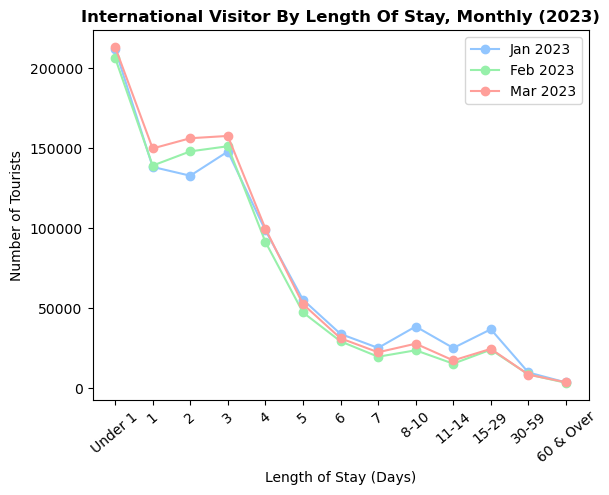

In [27]:
plt.plot(length_of_stay.loc['2023 Jan'], marker = 'o', label = 'Jan 2023')
plt.plot(length_of_stay.loc['2023 Feb'], marker = 'o', label = 'Feb 2023')
plt.plot(length_of_stay.loc['2023 Mar'], marker = 'o', label = 'Mar 2023')
plt.title('International Visitor By Length Of Stay, Monthly (2023)', fontweight='bold')
plt.ylabel('Number of Tourists')
plt.xlabel('Length of Stay (Days)')
plt.legend()
plt.xticks(rotation = 40)

From our latest international tourists data, we can see that most tourists that visits Singapore seldom stay for more than a week. Thus, rainy days are more likely to affect their travel itinerary. 

In [28]:
#I will extract out 5 years worth of data to analyze starting from 2019 to avoid COVID-19 years
five_years_tourists = pd.concat([profile_by_region[(profile_by_region['year'] <= 2019) & (profile_by_region['year'] >= 2015)].iloc[:,1:9], 
           profile_by_region[(profile_by_region['year'] <= 2019) & (profile_by_region['year'] >= 2015)].iloc[:,-2:]], axis=1)

In [29]:
five_years_tourists.head()

,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa,year,month
396,448133.0,207586.0,130360.0,13037.0,64780.0,158529.0,129274.0,6377.0,2015,Jan
397,380389.0,327971.0,113888.0,9073.0,57924.0,147155.0,72276.0,3562.0,2015,Feb
398,461999.0,198908.0,122861.0,16316.0,64764.0,160349.0,79761.0,5138.0,2015,Mar
399,478213.0,243881.0,88349.0,12262.0,49143.0,128157.0,94029.0,6410.0,2015,Apr
400,512074.0,214376.0,96909.0,10058.0,48014.0,99889.0,85227.0,4663.0,2015,May


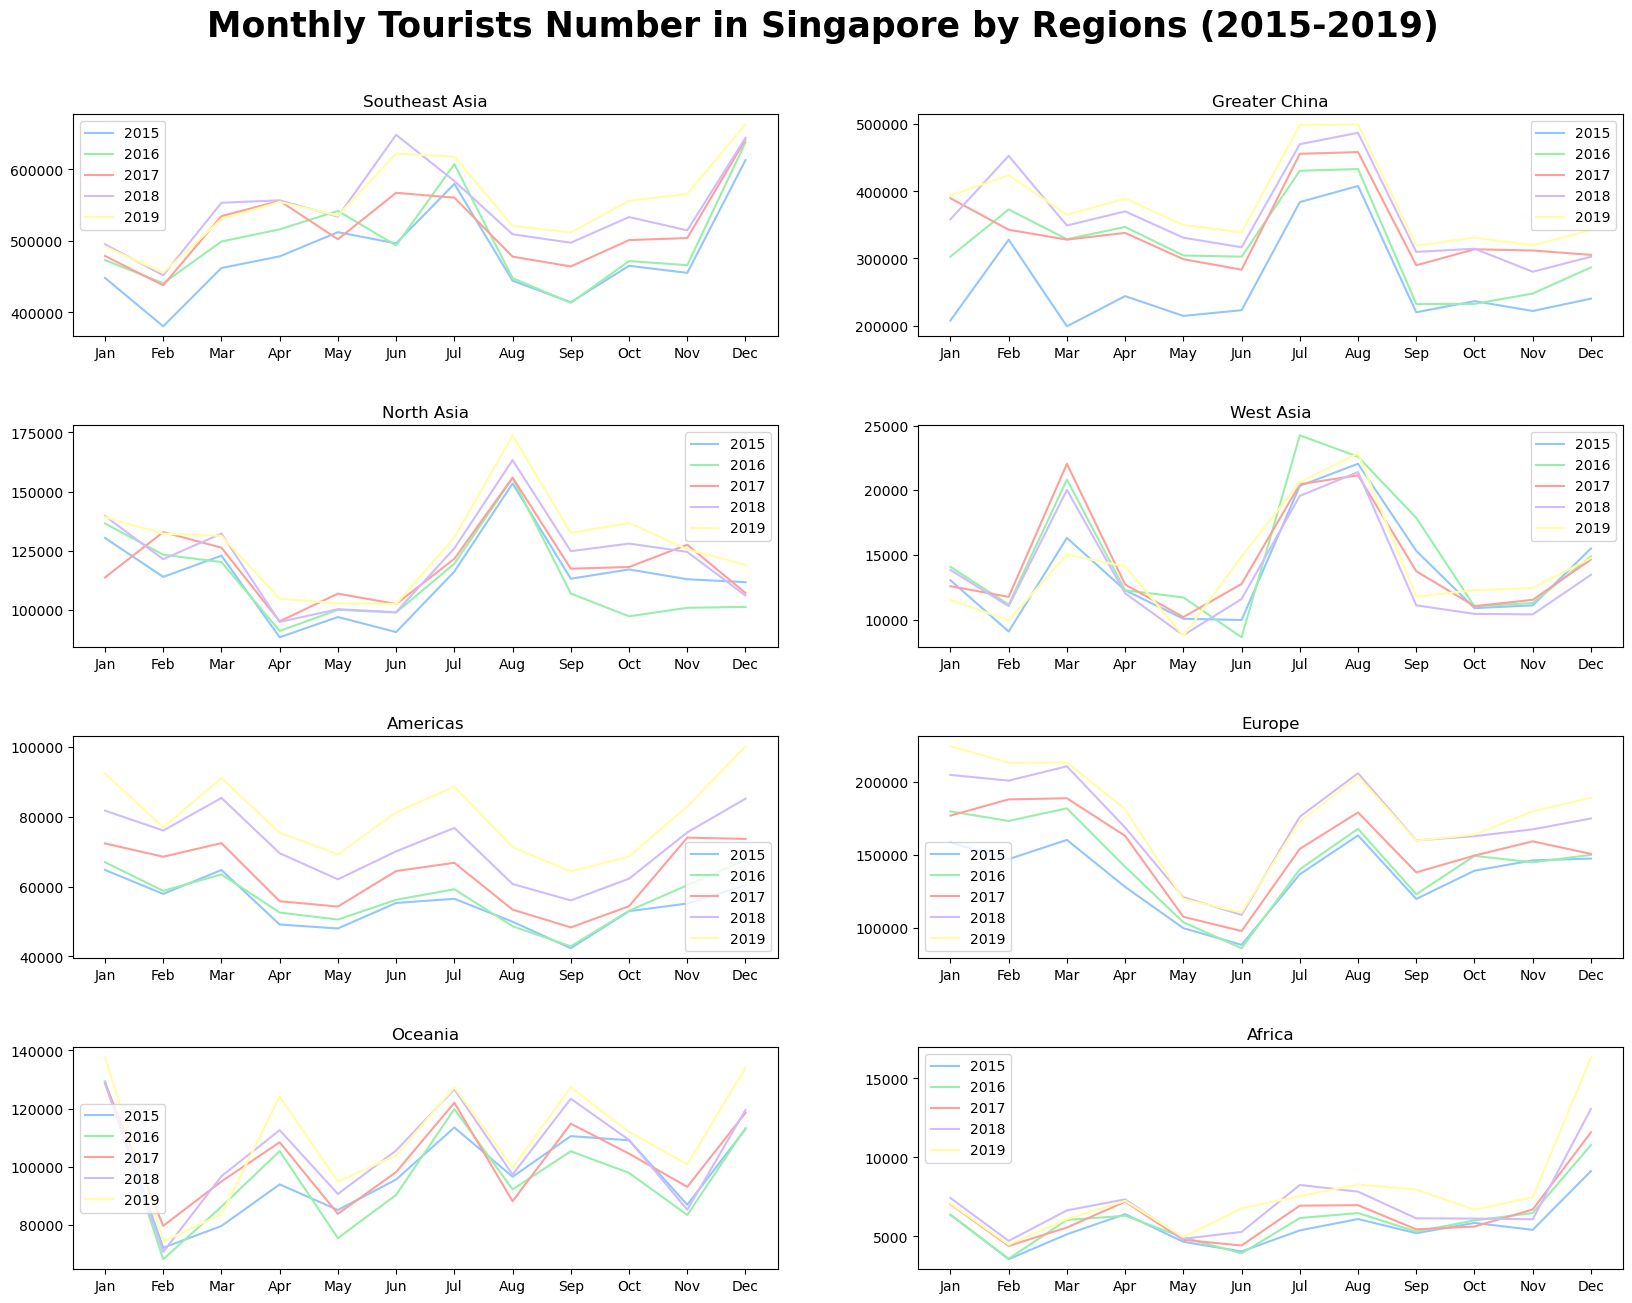

In [30]:
fig, ax = plt.subplots(4,2, figsize = (20,15))
figlist = [ax[0,0], ax[0,1], ax[1,0], ax[1,1], ax[2,0], ax[2,1], ax[3,0], ax[3,1]]
plt.subplots_adjust(hspace = 0.4)
plt.suptitle('Monthly Tourists Number in Singapore by Regions (2015-2019)', fontweight='bold', fontsize = 25, y=0.95)

#SEA
for x in five_years_tourists['year'].unique():
    ax[0,0].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['Southeast Asia'], label = x)

#Greater China
for x in five_years_tourists['year'].unique():
    ax[0,1].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['Greater China'], label = x)

#North Asia
for x in five_years_tourists['year'].unique():
    ax[1,0].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['North Asia'], label = x)

#West Asia
for x in five_years_tourists['year'].unique():
    ax[1,1].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['West Asia'], label = x)

#Americas
for x in five_years_tourists['year'].unique():
    ax[2,0].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['Americas'], label = x)

#Europe
for x in five_years_tourists['year'].unique():
    ax[2,1].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['Europe'], label = x)

#Oceania
for x in five_years_tourists['year'].unique():
    ax[3,0].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['Oceania'], label = x)

#Africa
for x in five_years_tourists['year'].unique():
    ax[3,1].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['Africa'], label = x)

for x,y in zip(figlist, five_years_tourists.columns):
    x.legend()
    x.title.set_text(y)
    x.locator_params(axis='y', tight=None, nbins=4)



Looking at the tourists numbers trend from 2015 to 2019, each region have a travelling pattern that is quite consistent between each year.<br>
For the Southeast Asians, June, July and December are their favourite months for coming to Singapore. February sees the least visits from the Southeast Asians tourists.<br>
Tourists from Greater China tend to visit in February, July and August. The West Asians tourists have a similar pattern, with their preferred months to visit being March, July and August.<br>
North Asians tourists are more likely to visit in August. The European tourists preferred visiting Singapore in the first three months of the year, and in August.<br>
The American tourists have several preferred months to visit Singapore, being January, March, July and December. Oceania tourists saw a similar pattern, preferring to visit in January, April, July, September and December. <br>
The African tourists highly favoured visiting Singapore in December.<br>
<br>
Most regions also showed increase in tourist numbers over the years, with the latest year (2019, in yellow) being higher on the y-axis compared to other years.
<br><br>
From these trends, we can tell that certain regions does not seem to mind Singapore's rainy months, as their peak visiting month coincide with the rainier months (April, May, Nov, Dec). West Asia and Greater China seem to be more likely to have their visiting pattern affected by rainy seasons. We will explore the correlation in the next section.

----------------------

## <a id='4'>Data Analysis and Visualization</a>

In [31]:
#Running correlation test to look at whether rainy seasons and tourists number are correlated
profile_by_region[(profile_by_region['year'] <= 2019) & (profile_by_region['year'] >= 2015)].corr().iloc[8:-1,:8]

,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa
maximum_rainfall_in_a_day,0.271532,-0.151997,-0.117995,-0.132421,0.048708,-0.105467,0.168478,0.270072
no_of_rainy_days,0.302196,-0.157585,-0.209482,-0.135414,-0.028009,-0.153408,0.173761,0.278628
total_rainfall,0.420228,-0.184602,-0.176058,-0.101138,0.134869,-0.087419,0.232607,0.521575
mean_rh,0.228541,-0.070758,-0.097595,-0.198959,0.221213,0.003317,0.138049,0.219128
mean_sunshine_hrs,-0.174575,0.408874,0.294841,0.211537,0.103341,0.315187,-0.184118,-0.239784


Text(0.5, 1.0, 'Correlation Heatmap - Weather vs Visitors Arrival by Regions (5 years average)')

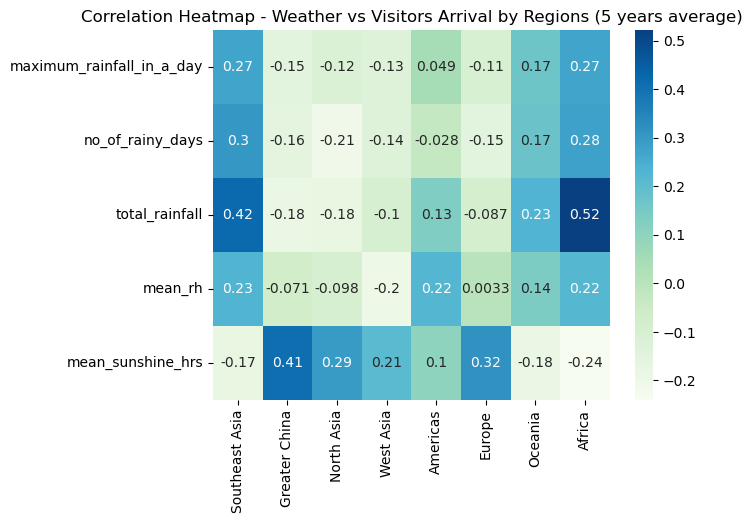

In [32]:
#5 years average
sns.heatmap(profile_by_region[(profile_by_region['year'] <= 2019) & (profile_by_region['year'] >= 2015)].corr().iloc[8:-1,:8], annot=True, cmap='GnBu')
plt.title('Correlation Heatmap - Weather vs Visitors Arrival by Regions (5 years average)')

From this correlation table, none of the regions have a strong correlation between their visiting frequency and the rainy season. To make sure the correlation is not affected by the 5 years average, we will look at the correlation by year.

In [33]:
#2019
profile_by_region[profile_by_region['year'] == 2019].corr().iloc[8:-1,:8]

,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa
maximum_rainfall_in_a_day,0.395436,-0.624362,-0.254323,-0.289105,0.199931,-0.044369,0.263006,0.388372
no_of_rainy_days,0.624235,-0.511857,-0.497390,-0.206114,0.164994,-0.553127,0.125876,0.241659
total_rainfall,0.689337,-0.479954,-0.416651,-0.109456,0.452630,-0.127638,0.339381,0.767071
mean_rh,0.695354,-0.497044,-0.626923,-0.280611,0.320681,-0.436240,0.309177,0.539296
mean_sunshine_hrs,-0.733150,0.542941,0.463743,0.026844,-0.170852,0.470155,-0.549582,-0.604453


Text(0.5, 1.0, 'Correlation Heatmap - Weather vs Visitors Arrival by Regions (2019)')

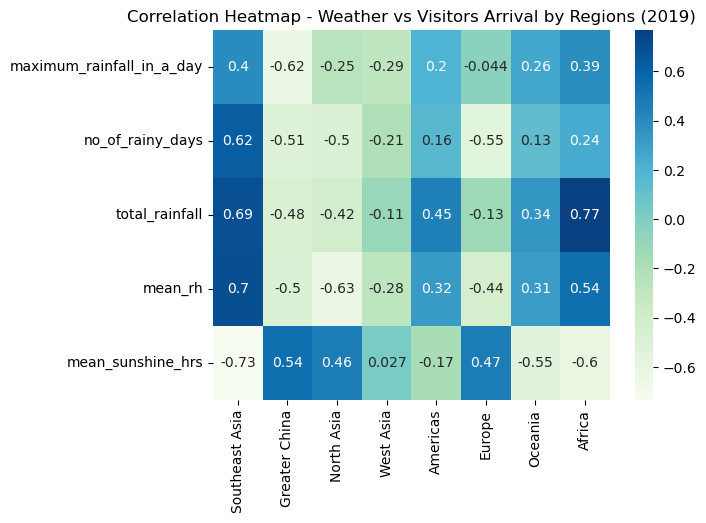

In [34]:
#2019
sns.heatmap(profile_by_region[profile_by_region['year'] == 2019].corr().iloc[8:-1,:8], annot=True, cmap='GnBu')
plt.title('Correlation Heatmap - Weather vs Visitors Arrival by Regions (2019)')

<small>2019 data showed that Greater China and North Asia tourist are less likely to visit in months with more rain (r = -0.51, -0.50). The Europe and West Asia tourists also showed weak negative correlation between number of rainy days and their visitors number. Interestingly, data also implied that Southeast Asia tourist are more likely to visit in months with more rain and less sunshine hours.

In [35]:
#2018
profile_by_region[profile_by_region['year'] == 2018].corr().iloc[8:-1,:8]

,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa
maximum_rainfall_in_a_day,0.255452,-0.349901,0.002245,-0.266121,-0.400927,-0.469535,0.476204,0.102484
no_of_rainy_days,0.143217,-0.685762,-0.129792,-0.432870,0.098894,-0.299258,0.213589,0.123850
total_rainfall,0.179072,-0.403195,0.145668,-0.197659,-0.046240,-0.221939,0.567096,0.197437
mean_rh,0.023632,-0.458215,0.031807,-0.238268,0.472683,0.087776,0.259283,0.228295
mean_sunshine_hrs,-0.395326,0.626420,0.124218,0.229281,-0.218367,0.377066,-0.319983,-0.144229


Text(0.5, 1.0, 'Correlation Heatmap - Weather vs Visitors Arrival by Regions (2018)')

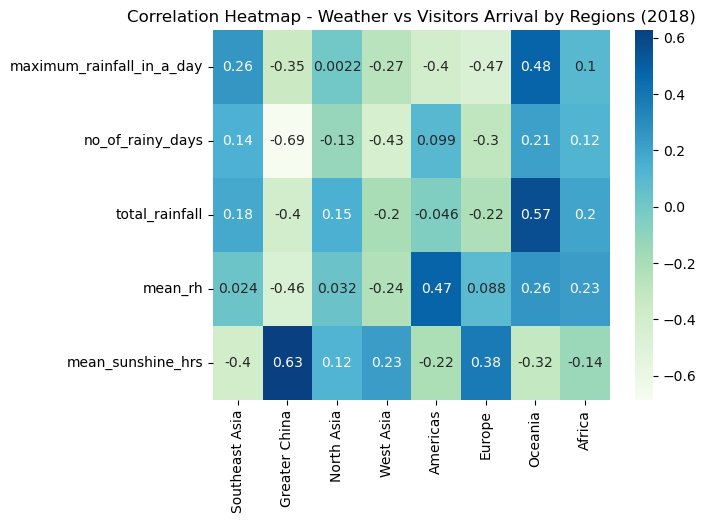

In [36]:
#2018
sns.heatmap(profile_by_region[profile_by_region['year'] == 2018].corr().iloc[8:-1,:8], annot=True, cmap='GnBu')
plt.title('Correlation Heatmap - Weather vs Visitors Arrival by Regions (2018)')

<small>2018 data showed that Greater China tourist are less likely to visit in months with more rain (r = -0.69) and preferred visiting in months with more sunshine hours (r = 0.63). Unlike the 2019 data, North Asian tourists does not show any correlation between their visiting pattern and the rainy season. The West Asian tourists showed weak negative correlation (r=-0.43) between their visiting pattern and months with more rains.

In [37]:
#2017
profile_by_region[profile_by_region['year'] == 2017].corr().iloc[8:-1,:8]

,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa
maximum_rainfall_in_a_day,0.461739,-0.082687,-0.369722,-0.283707,0.522305,0.050668,0.366357,0.725525
no_of_rainy_days,-0.037736,-0.180431,-0.053273,-0.427885,0.021350,0.212457,0.197430,0.544241
total_rainfall,0.456236,-0.398939,-0.367709,-0.382165,0.474514,0.026321,0.168609,0.694513
mean_rh,0.086831,-0.378247,-0.241880,-0.500353,0.532594,0.246962,0.063246,0.400748
mean_sunshine_hrs,-0.017535,0.288371,0.213970,0.397658,-0.115470,-0.010081,-0.250105,-0.306273


Text(0.5, 1.0, 'Correlation Heatmap - Weather vs Visitors Arrival by Regions (2017)')

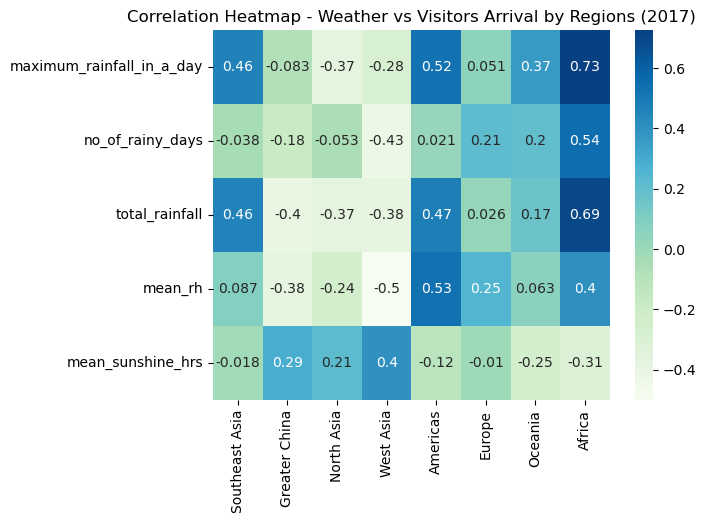

In [38]:
#2017
sns.heatmap(profile_by_region[profile_by_region['year'] == 2017].corr().iloc[8:-1,:8], annot=True, cmap='GnBu')
plt.title('Correlation Heatmap - Weather vs Visitors Arrival by Regions (2017)')

<small>Every region except for West Asia (r = -0.42) does not try avoid the rainy season in 2017. The Southeast Asian and American tourists came to Singapore in the months with heavier rains. 

In [39]:
#2016
profile_by_region[profile_by_region['year'] == 2016].corr().iloc[8:-1,:8]

,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa
maximum_rainfall_in_a_day,0.223473,-0.233044,-0.300404,-0.488056,0.164732,-0.327878,-0.120652,0.023993
no_of_rainy_days,0.476739,-0.130442,-0.170711,0.057635,0.175167,-0.138788,0.528343,0.661181
total_rainfall,0.320180,-0.257241,-0.277976,-0.377213,0.208144,-0.245641,-0.073001,0.366935
mean_rh,-0.097705,0.247397,0.169963,-0.251305,0.296224,-0.049382,-0.102915,-0.506126
mean_sunshine_hrs,0.004627,0.587382,0.498132,0.437955,0.097196,0.418209,0.114432,-0.169060


Text(0.5, 1.0, 'Correlation Heatmap - Weather vs Visitors Arrival by Regions (2016)')

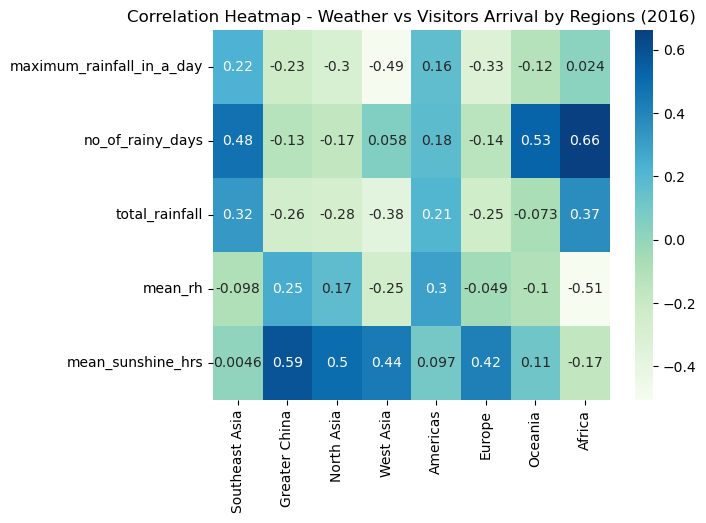

In [40]:
#2016
sns.heatmap(profile_by_region[profile_by_region['year'] == 2016].corr().iloc[8:-1,:8], annot=True, cmap='GnBu')
plt.title('Correlation Heatmap - Weather vs Visitors Arrival by Regions (2016)')

<small>In 2016, no regions showed active avoidance in visiting Singapore during the rainy season. West Asian tourists are less likely to visit in months with heavier rain (r=-0.49). Southeast Asian tourists did not mind the rainier seasons (r=0.48). Tourists from Greater China, North Asia, West Asia and Europe are more likely to visit in the months with more sunshine hours (r > 0.4).

In [41]:
#2015
profile_by_region[profile_by_region['year'] == 2015].corr().iloc[8:-1,:8]

,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa
maximum_rainfall_in_a_day,0.371534,0.468750,0.694703,0.843770,0.291994,0.490192,0.254456,0.392239
no_of_rainy_days,0.778840,0.138366,-0.260204,0.175996,-0.183889,-0.155427,0.191553,0.641399
total_rainfall,0.718941,0.195324,0.245620,0.497703,0.156018,0.213392,0.359793,0.812987
mean_rh,0.468240,-0.300290,-0.103380,-0.132294,0.167584,0.080685,0.068173,0.636920
mean_sunshine_hrs,-0.022352,0.229495,-0.011263,0.066235,0.541448,0.159668,-0.167081,-0.234403


Text(0.5, 1.0, 'Correlation Heatmap - Weather vs Visitors Arrival by Regions (2015)')

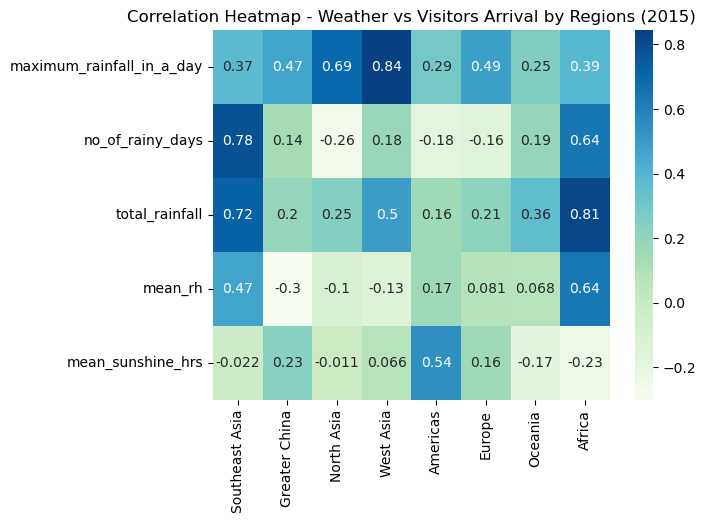

In [42]:
#2015
sns.heatmap(profile_by_region[profile_by_region['year'] == 2015].corr().iloc[8:-1,:8], annot=True, cmap='GnBu')
plt.title('Correlation Heatmap - Weather vs Visitors Arrival by Regions (2015)')

<small>In 2015, tourists from most regions still visits despite the heavier rain. No regions showed active avoidance in visiting in months with more rainy days. The Southeast Asian tourists did not mind the rainier seasons, which is consistent with previous year findings.

The above 5 years correlation trend showed that:<br>
1. Greater China tourists are less likely to visit in rainy seasons in recent years (2018, 2019)
2. Southeast Asian tourists generally do not mind rainy seasons as their peak visit months coincide with our rainy seasons

![China outbound travels in 2017 and 2018](china_outbound_travels_1718.jpg)<br>
<small>Source: China Tourism Academy

The above graph is extracted from the China Tourism Academy. The y-axis showed the number of citizens (in 10,000) that went on outbound trip and the x-axis are the months.<br>
The data from China Tourism Academy showed little fluctuation in their outbound travels between months in 2017 and 2018. Hence, their timing of visit to Singapore is unlikely to be due to their travelling peak seasons.

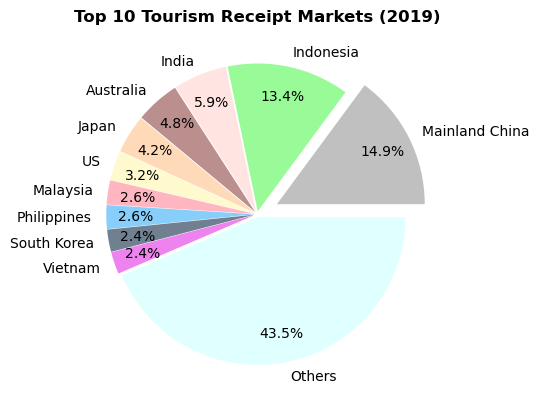

In [43]:
colors = ['silver', 'palegreen', 'mistyrose', 'rosybrown', 'peachpuff', 'lemonchiffon', 'lightpink', 'lightskyblue', 'slategrey', 'violet', 'lightcyan']
revenue.loc['2019 Tourism Receipt (in S$ millions)'].plot(kind='pie', label = '', colors=colors, autopct='%1.1f%%', pctdistance=0.8, explode=[0.15, 0.02, 0.02, 0.02,0.02, 0.02, 0.02, 0.02,0.02, 0.02, 0.02])
plt.title('Top 10 Tourism Receipt Markets (2019)', fontweight='bold')
plt.show()

Text(44.38500694444444, 0.5, 'Number of Tourists')

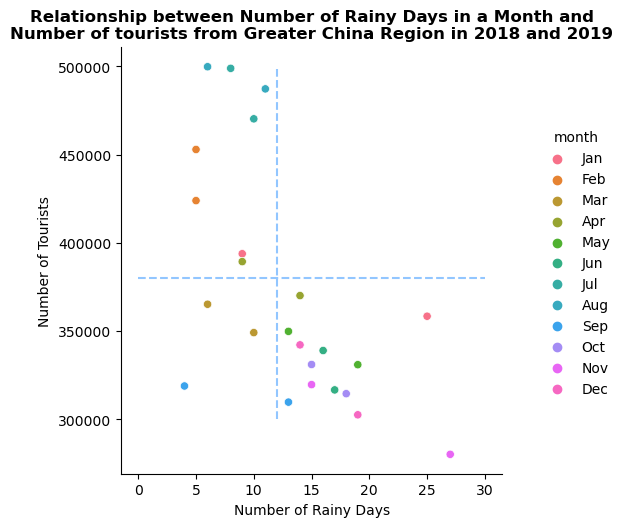

In [44]:
sns.relplot(data = profile_by_region[(profile_by_region['year'] <= 2019) & (profile_by_region['year'] >= 2018)].loc[:,('Time Period', 'month', 'Greater China', 'no_of_rainy_days')], x= 'no_of_rainy_days', y= 'Greater China', hue = 'month')
plt.hlines(380000, 0, 30, linestyles = 'dashed')
plt.vlines(12, 300000, 500000, linestyles= 'dashed')
plt.title('Relationship between Number of Rainy Days in a Month and\nNumber of tourists from Greater China Region in 2018 and 2019', fontweight = 'bold')
plt.xlabel('Number of Rainy Days')
plt.ylabel('Number of Tourists')

In [45]:
#The difference in Greater China region tourist number in the peak month and off-peak month
five_years_tourists[five_years_tourists['year']==2019]['Greater China'].max() - five_years_tourists[five_years_tourists['year']==2019]['Greater China'].min()

180921.0

China being our biggest tourism revenue market in 2019 shows the potential of significantly increasing revenue by increasing the number of visitors during months with lesser visits. The month with the most tourists from Greater China region has an almost 200 thousands difference in monthly tourists from the region compared to the month with the least tourists from Greater China region in the year of 2019. <br>
From the relational plot above, months in the lower right quadrants are months that have high number of rainy days and lower incoming tourists from the Greater China regions. By coming up with more wet weather activities, events and attractions during those months, we can drive the number of incoming visitors up.

--------------

## Conclusions

There is a possibility that tourists from the Greater China regions are starting to avoid visiting Singapore during the rainy seasons in the recent years. For the past decades, our raining seasons had been quite consistent, with dry period in February and wetter period at the end of the year. Singapore has been increasing in popularity in terms of tourism destination in the past few years. It is expected that with more international visits, tourists will start to form their opinions on the optimal time to visit the country. <br>
On the other hand, Southeast Asian tourists seem not not mind our rainy seasons. This may be due to the similarity in climate between their country and our country. <br>

The findings showed that there is a correlation between rainy seasons and number of visitors from the Greater China region in recent years. However, as correlation does not imply causation, we need to run further analysis to determine if their timing of visit is indeed influenced by our weather pattern. I recommend doing a survey on Greater China tourists that are planning to visit Singapore in the near future and finding out if the have preference to visit at certain timing of the year and if so, the reason why.<br>

From the data above, we saw that most tourists stayed for less than a week in Singapore when they visit. We can do a survey on Greater China tourists that had visited Singapore in the past 5 years to find out how they decided their timing of visit and investigate if they had encountered rain during their visit and whether it had affected their itinerary and experiences. 

If the tourists from Greater China are more hesistant to visit during rainy season, it would be beneficial to us to target this group of tourists by offering alternative attractions and events during the rainy seasons. Afterall, Greater China is our top Tourism Receipt market. In 2019, international visitors brought in a total of SGD$27.7 billion, of which SGD$4.124 billion from Mainland China alone. [1] In order to keep our tourism revenue on an upward trend, it is important to identify periods of time that interational visitors are more hesistant to visit, and to come up with more attractions and events that would not be dampened by the rainy seasons. At peak visiting months, Greater China region brings in almost 500 thousands visitors monthly, while low peak months brings in low 300 thousands monthly visitors. By putting focus on our largest market for tourism receipt, we can potentially increase overall tourism revenue by attracting them to visit in the months with lower visit numbers. <br><br>
There are some strategies that we can look into to boost tourism during rainy season.<br>
1. To host more indoor events and attractions
2. Work with tour agencies in Greater China region to include more indoor attractions (such as Gardens by the Bay, ArtScience Museum)
3. Instead of a beach/outdoor themed vacation, we could promote food tours during rainy seasons

<br>
References:<br>
<small>[1] Singapore Tourism Board Annual Report 2019-2020

-------------

## <a id='6'>Coding Challenges</a>

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [46]:
# Code:
alist = [1,2,3,4,5,6]
def cal_mean(alist):
    alistmean = sum(alist)/len(alist)
    return alistmean

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [47]:
# Code:
def cal_std(alist):
    alistmean = sum(alist)/len(alist)
    counter = 0
    for x in alist:
        counter += ((x - alistmean) ** 2)/len(alist)
    return counter ** 0.5

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.

In [48]:
#Creating new dataframe for weather related columns only, from 1982 to 2022
weather = profile_by_region.iloc[:,[0,9,10,11,12,13,14,15]]

In [49]:
#weather statistics by year
weather.pivot_table(index = 'year', values=('maximum_rainfall_in_a_day', 'no_of_rainy_days', 'total_rainfall', 'mean_rh', 'mean_sunshine_hrs'), 
                              aggfunc=(np.mean, np.median, np.std, max))

maximum_rainfall_in_a_day                              mean_rh  \
                           max       mean median        std     max   
year                                                                  
1982                     109.0  38.150000  34.75  28.297269    87.7   
1983                     181.8  57.891667  41.60  56.056829    88.0   
1984                     154.4  66.758333  48.20  41.293307    86.7   
1985                      86.8  32.016667  29.75  19.133114    86.2   
1986                     131.7  59.933333  53.85  34.106100    86.6   
1987                     127.4  47.091667  37.85  33.400448    86.0   
1988                     187.3  67.525000  69.20  46.813734    86.8   
1989                     148.6  60.216667  47.15  35.153684    87.6   
1990                     153.7  49.900000  44.50  38.967119    86.0   
1991                     129.9  50.308333  46.30  32.922622    90.7   
1992                     120.6  58.241667  44.35  36.560745    90.3   
1993                      67.6  48.158333  49.95  13.553896    87.4   
1994                     178.3  54.316667  40.25  51.549021    88.4   
1995                     198.6  69.775000  48.65  57.431147    87.5   
1996                      94.3  57.291667  58.10  18.476789    85.5   
1997                      65.8  34.933333  35.65  18.907398    85.3   
1998                      84.4  51.791667  53.90  24.024210    88.5   
1999                      76.9  43.958333  41.95  13.113314    88.3   
2000                     127.6  51.308333  39.10  29.908906    87.6   
2001                     211.1  76.325000  62.50  50.967924    87.4   
2002                      84.0  47.083333  40.55  26.082939    88.7   
2003                     194.4  63.275000  49.75  46.252138    87.3   
2004                     177.8  64.866667  49.40  49.759647    86.7   
2005                     133.8  50.091667  45.35  37.040947    86.4   
2006                     198.0  62.191667  40.55  50.887228    88.5   
2007                     159.0  69.016667  54.00  43.950465    86.8   
2008                     133.9  58.266667  46.65  34.240522    87.1   
2009                      86.6  47.125000  41.95  22.248437    86.3   
2010                     121.1  54.441667  50.30  32.389658    85.9   
2011                     216.2  65.516667  54.00  52.519950    88.4   
2012                      92.3  47.958333  38.30  22.945289    87.3   
2013                     139.8  62.066667  45.10  37.260199    86.9   
2014                      64.4  33.916667  32.00  16.922596    82.6   
2015                      63.2  31.833333  28.50  14.771923    81.1   
2016                      75.4  49.383333  57.10  23.996130    79.6   
2017                      69.8  38.750000  31.10  14.505955    86.3   
2018                      60.6  34.933333  39.20  15.879394    86.6   
2019                      92.2  37.866667  33.30  29.309550    83.9   
2020                      64.2  41.250000  39.50  14.026501    81.7   
2021                     210.6  64.216667  54.70  51.478183    82.6   
2022                      59.4  42.350000  40.40  12.739029    80.3   

                                 mean_sunshine_hrs                             \
           mean median       std               max      mean median       std   
year                                                                            
1982  81.966667  81.35  2.781214               7.6  5.750000   5.60  1.252271   
1983  82.283333  82.85  3.623367               9.3  5.625000   5.65  2.034755   
1984  84.616667  84.10  1.363040               6.4  5.083333   5.30  0.960902   
1985  83.208333  83.60  1.935533               8.7  5.591667   5.55  1.235430   
1986  82.866667  84.00  2.951220               7.2  5.525000   5.50  1.001930   
1987  82.866667  83.00  1.920858               9.2  5.916667   5.70  1.388153   
1988  83.841667  84.15  1.588858               6.7  5.375000   5.50  0.897598   
1989  84.350000  84.25  2.441125               6.7  5.533333   5.50  0

In [50]:
#weather statistics by month
weather.pivot_table(index = 'month', values=('maximum_rainfall_in_a_day', 'no_of_rainy_days', 'total_rainfall', 'mean_rh', 'mean_sunshine_hrs'), 
                              aggfunc=(np.mean, np.median, np.std, max)).reindex(months)

maximum_rainfall_in_a_day                              mean_rh  \
                            max       mean median        std     max   
month                                                                  
Jan                       216.2  77.187805  56.20  53.848678    88.3   
Feb                       159.3  37.526829  29.60  35.273149    87.5   
Mar                       122.8  47.126829  46.00  24.975568    87.6   
Apr                       102.4  46.931707  43.30  22.442877    87.0   
May                       153.7  48.417073  44.00  25.445028    86.6   
Jun                       121.1  43.490244  38.40  22.735257    86.3   
Jul                       121.1  40.751220  34.30  23.302469    85.3   
Aug                       181.8  48.953659  36.60  35.415901    85.6   
Sep                       187.3  45.277500  41.75  31.068068    84.8   
Oct                       139.8  43.817500  38.35  25.310076    87.4   
Nov                       198.6  70.087500  61.35  38.967733    88.4   
Dec                       211.1  79.125000  71.10  44.860380    90.7   

                                  mean_sunshine_hrs                   \
            mean median       std               max      mean median   
month                                                                  
Jan    83.465854   84.1  3.352358               8.7  5.719512   5.60   
Feb    80.890244   80.8  3.594148               9.3  7.100000   7.20   
Mar    81.831707   82.3  4.177885               8.9  6.304878   6.40   
Apr    82.597561   82.8  3.055609               7.2  6.034146   5.90   
May    82.351220   82.9  2.497311               7.0  5.956098   5.90   
Jun    80.917073   81.0  2.488162               7.3  5.929268   6.00   
Jul    80.929268   81.3  2.818088               8.1  6.102439   6.20   
Aug    80.897561   80.7  3.071440               7.6  5.846341   5.80   
Sep    81.237500   82.2  3.077352               7.0  5.307500   5.35   
Oct    81.807500   82.4  3.037998               6.5  5.062500   5.05   
Nov    84.790000   85.5  2.513227               5.8  4.452500   4.50   
Dec    85.357500   85.7  3.237828               5.7  4.357500   4.50   

                no_of_rainy_days                             total_rainfall  \
            std              max       mean median       std            max   
month                                                                         
Jan    1.322161               25  13.365854   13.0  5.425662          692.8   
Feb    1.430035               22   8.292683    8.0  5.158701          470.4   
Mar    1.361975               22  12.487805   11.0  5.450330          361.3   
Apr    0.662046               21  14.439024   14.0  3.633516          311.6   
May    0.509926               23  13.926829   13.0  3.304469          370.8   
Jun    0.798825               21  13.195122   13.0  3.226604          265.8   
Jul    0.983486               22  13.512195   13.0  3.994508          305.4   
Aug    0.796272               24  13.902439   13.0  3.839303          327.3   
Sep    0.821315               22  13.225000   13.0  4.393979          440.4   
Oct    0.759449               21  14.950000   16.0  4.437313          351.4   
Nov    0.677093               27  19.025000   19.0  3.612567          508.4   
Dec    0.859901               24  18.650000   19.0  3.309272          765.9   

                                       
             mean  median         std  
month                                  
Jan    234.295122  193.90  167.178569  
Feb    103.919512   69.20  106.165449  
Mar    160.904878  136.20  100.613478  
Apr    158.480488  158.50   70.630079  
May    166.221951  157.50   75.146209  
Jun    135.180488  118.30   65.547236  
Jul    147.387805  143.20   70.139679  
Aug    149.424390  146.60   71.926281  
Sep    147.287500  127.40   91.249504  
Oct    159.677500  162.85   81.647835  
Nov    256.170000  250.80  102.026194  
Dec    311.052500  297.45  144.618916

2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`

In [51]:
{key:cal_std(value) for key,value in weather.iloc[:,1:-1].items()}

{'maximum_rainfall_in_a_day': 35.709779188733116,
 'no_of_rainy_days': 4.94232219132241,
 'total_rainfall': 113.7992517047005,
 'mean_rh': 3.4104399291902845,
 'mean_sunshine_hrs': 1.2044686452879791,
 'year': 11.740612333388455}

3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?

In [52]:
weather1990 = weather[(weather['year'] >= 1990) & (weather['year'] <= 1999)]
weather2000 = weather[(weather['year'] >= 2000) & (weather['year'] <= 2009)]
weather2010 = weather[(weather['year'] >= 2010) & (weather['year'] <= 2019)]
weather2020 = weather[weather['year'] >= 2020]

In [53]:
#Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
print(f"The month with highest total rainfall in 1990s is in {weather[weather['total_rainfall'] == weather1990['total_rainfall'].max()].iloc[0,0]} with a total of {weather1990['total_rainfall'].max()}mm of rain.")
print(f"The month with lowest total rainfall in 1990s is in {weather[weather['total_rainfall'] == weather1990['total_rainfall'].min()].iloc[0,0]} with a total of {weather1990['total_rainfall'].min()}mm of rain.")
print('')
print(f"The month with highest total rainfall in 2000s is in {weather[weather['total_rainfall'] == weather2000['total_rainfall'].max()].iloc[0,0]} with a total of {weather2000['total_rainfall'].max()}mm of rain.")
print(f"The month with lowest total rainfall in 2000s is in {weather[weather['total_rainfall'] == weather2000['total_rainfall'].min()].iloc[0,0]} with a total of {weather2000['total_rainfall'].min()}mm of rain.")
print('')
print(f"The month with highest total rainfall in 2010s is in {weather[weather['total_rainfall'] == weather2010['total_rainfall'].max()].iloc[0,0]} with a total of {weather2010['total_rainfall'].max()}mm of rain.")
print(f"The month with lowest total rainfall in 2010s is in {weather[weather['total_rainfall'] == weather2010['total_rainfall'].min()].iloc[0,0]} with a total of {weather2010['total_rainfall'].min()}mm of rain.")
print('')
print(f"The month with highest total rainfall in 2020s is in {weather[weather['total_rainfall'] == weather2020['total_rainfall'].max()].iloc[0,0]} with a total of {weather2020['total_rainfall'].max()}mm of rain.")
print(f"The month with lowest total rainfall in 2020s is in {weather[weather['total_rainfall'] == weather2020['total_rainfall'].min()].iloc[0,0]} with a total of {weather2020['total_rainfall'].min()}mm of rain.")


The month with highest total rainfall in 1990s is in 1992 Dec with a total of 502.7mm of rain.
The month with lowest total rainfall in 1990s is in 1997 Jan with a total of 15.4mm of rain.

The month with highest total rainfall in 2000s is in 2006 Dec with a total of 765.9mm of rain.
The month with lowest total rainfall in 2000s is in 2005 Feb with a total of 8.4mm of rain.

The month with highest total rainfall in 2010s is in 2011 Jan with a total of 513.2mm of rain.
The month with lowest total rainfall in 2010s is in 2014 Feb with a total of 0.2mm of rain.

The month with highest total rainfall in 2020s is in 2021 Jan with a total of 692.8mm of rain.
The month with lowest total rainfall in 2020s is in 2021 Feb with a total of 1.0mm of rain.


In [54]:
#Which year have the highest and lowest total rainfall in the date range of analysis?
print(f"The year with the highest total rainfall within the date range of analysis is {weather[weather['total_rainfall']==weather['total_rainfall'].max()]['year'].iloc[0]}.")
print(f"The year with the lowest total rainfall within the date range of analysis is {weather[weather['total_rainfall']==weather['total_rainfall'].min()]['year'].iloc[0]}.")

The year with the highest total rainfall within the date range of analysis is 2006.
The year with the lowest total rainfall within the date range of analysis is 2014.


In [55]:
#Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
#1990s
htr1990 = weather1990[weather1990['no_of_rainy_days']==weather1990['no_of_rainy_days'].max()]['Time Period'].to_list()
print(f"The month with highest number of rainy days in 1990s is in {', '.join(htr1990)} with a total of {weather1990['no_of_rainy_days'].max()} days of rain.")
ltr1990 = weather1990[weather1990['no_of_rainy_days']==weather1990['no_of_rainy_days'].min()]['Time Period'].to_list()
print(f"The month with lowest number of rainy days in 1990s is in {', '.join(ltr1990)} with a total of {weather1990['no_of_rainy_days'].min()} days of rain.")
print('')
#2000s
htr2000 = weather2000[weather2000['no_of_rainy_days']==weather2000['no_of_rainy_days'].max()]['Time Period'].to_list()
print(f"The month with highest number of rainy days in 2000s is in {', '.join(htr2000)} with a total of {weather2000['no_of_rainy_days'].max()} days of rain.")
ltr2000 = weather2000[weather2000['no_of_rainy_days']==weather2000['no_of_rainy_days'].min()]['Time Period'].to_list()
print(f"The month with lowest number of rainy days in 2000s is in {', '.join(ltr2000)} with a total of {weather2000['no_of_rainy_days'].min()} days of rain.")
print('')
#2010s
htr2010 = weather2010[weather2010['no_of_rainy_days']==weather2010['no_of_rainy_days'].max()]['Time Period'].to_list()
print(f"The month with highest number of rainy days in 2010s is in {', '.join(htr2010)} with a total of {weather2010['no_of_rainy_days'].max()} days of rain.")
ltr2010 = weather2010[weather2010['no_of_rainy_days']==weather2010['no_of_rainy_days'].min()]['Time Period'].to_list()
print(f"The month with lowest number of rainy days in 2010s is in {', '.join(ltr2010)} with a total of {weather2010['no_of_rainy_days'].min()} days of rain.")
print('')
#2020s
htr2020 = weather2020[weather2020['no_of_rainy_days']==weather2020['no_of_rainy_days'].max()]['Time Period'].to_list()
print(f"The month with highest number of rainy days in 2020s is in {', '.join(htr2020)} with a total of {weather2020['no_of_rainy_days'].max()} days of rain.")
ltr2020 = weather2020[weather2020['no_of_rainy_days']==weather2020['no_of_rainy_days'].min()]['Time Period'].to_list()
print(f"The month with lowest number of rainy days in 2020s is in {', '.join(ltr2020)} with a total of {weather2020['no_of_rainy_days'].min()} days of rain.")

The month with highest number of rainy days in 1990s is in 1991 May, 1992 Dec, 1997 Dec with a total of 23 days of rain.
The month with lowest number of rainy days in 1990s is in 1997 Jan, 1997 Sep with a total of 3 days of rain.

The month with highest number of rainy days in 2000s is in 2002 Dec with a total of 24 days of rain.
The month with lowest number of rainy days in 2000s is in 2002 Feb with a total of 2 days of rain.

The month with highest number of rainy days in 2010s is in 2018 Nov with a total of 27 days of rain.
The month with lowest number of rainy days in 2010s is in 2014 Feb with a total of 1 days of rain.

The month with highest number of rainy days in 2020s is in 2021 Aug with a total of 24 days of rain.
The month with lowest number of rainy days in 2020s is in 2021 Feb with a total of 2 days of rain.


In [56]:
#Which year have the highest and lowest number of rainy days in the date range of analysis?
print(f"The year with the highest total rainfall within the date range of analysis is {weather[weather['no_of_rainy_days']==weather['no_of_rainy_days'].max()]['year'].iloc[0]}.")
print(f"The year with the lowest total rainfall within the date range of analysis is {weather[weather['no_of_rainy_days']==weather['no_of_rainy_days'].min()]['year'].iloc[0]}.")

The year with the highest total rainfall within the date range of analysis is 2018.
The year with the lowest total rainfall within the date range of analysis is 2014.


In [58]:
#find outliers
def outlier(df, col):
    out_up = np.percentile(col, 75) + (np.subtract(*np.percentile(col, [75,25])) * 1.5)
    out_down = np.percentile(col, 25) - (np.subtract(*np.percentile(col, [75,25])) * 1.5)
    return df[(col > out_up) | (col < out_down)]


#use this to find all the outliers in the weather dataframe
#for x in weather.iloc[:,1:-2].columns:
    #print(f"Outliers in {x} column")
    #print(outlier(weather, weather[x]))


#Un-comment the below to find outliers in specific columns   
#outlier(weather, weather['mean_sunshine_hrs'])

,Time Period,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,year,month
13,1983 Feb,5.1,2,5.6,78.0,9.3,1983,Feb
61,1987 Feb,34.8,7,86.9,79.0,9.2,1987,Feb
277,2005 Feb,7.2,3,8.4,77.7,9.1,2005,Feb
445,2019 Feb,13.4,5,31.6,74.1,9.2,2019,Feb
